In [1]:
import numpy as np
from scipy import io
from scipy.stats import ranksums
from entropy.MCRDE.MCRDE import MCRDE
from utils.plot_Entropy import plot_Entropy
from utils.write_txt import write_txt
import pandas as pd

#Q. MCRDE parameters 관련하여 파라미터의 특성에 대한 설명, 디폴트값을 어떻게 해야하는지? 파라미터 변화가 중요한지?
config = "config2"

if config == "config1":
    N = 1000   # RRIs data length
    m = 3   # embeding dimension
    c = 6   # number of class
    tau = 1    # delay factor
    scale = 100    # scale factor

elif config =="config2":
    N = 1000   # RRIs data length
    m = 3   # embeding dimension
    c = 6   # number of class
    tau = 1    # delay factor
    scale = 25    # scale factor

# Data Preparation

In [2]:
dataFlag ="data1"
if dataFlag =="data1":
    # 심부전 실험 데이터
    # Load RRIs data(type:numpy array, row:subjects, col:RRIs data of subjects)
    RRIs_CHF_path = './sample_data/RRIs_CHF_1000'          # CHF(= Congestive Heart Failure) -> 울혈성 심부전 피험자 14명의 RRIs data
    RRIs_HEALTHY_path = './sample_data/RRIs_HEALTHY_1000'  # HEALTHY                         -> 건강한 피험자 14명 RRIs data
    RRIs_CHF_data = io.loadmat(RRIs_CHF_path)
    RRIs_CHF_1000 = RRIs_CHF_data['RRIs_CHF_1000']              # Load RRIs data of CHF(length=1000) 
    RRIs_HEALTHY_data = io.loadmat(RRIs_HEALTHY_path)
    RRIs_HEALTHY_1000 = RRIs_HEALTHY_data['RRIs_HEALTHY_1000']  # Load RRIs data of HEALTHY(length=1000)
    data0 = RRIs_CHF_1000[:N]
    data1 = RRIs_HEALTHY_1000[:N]
    
#Q. 다른 추가 실험 Data 제공이 가능할까요? (다른 도메인)

#### inputShape: (subject, timepointData) ex) 14명의 실험자에 대한 1000개 길이의 데이터

<AxesSubplot: >

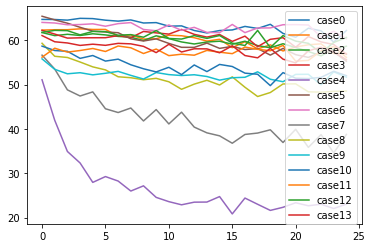

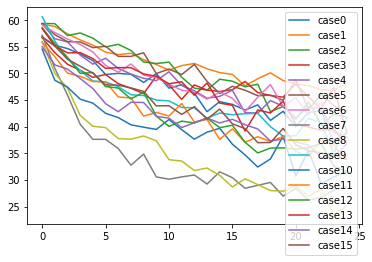

In [3]:
def getMCRDEResult(data):
    n_s = len(data) # number of subject 
    mcrde_data = pd.DataFrame()
    for i in range(n_s):
        index_name = 'case'+str(i)
        # Calculate MCRDE
        mcrde_dataValue = pd.Series(MCRDE(data[i, :], m, c, tau, scale).reshape(-1))
        mcrde_data[index_name] = mcrde_dataValue
    return mcrde_data

mcrde_data0 = getMCRDEResult(data0)
mcrde_data1 = getMCRDEResult(data1)
mcrde_data0.plot()
mcrde_data1.plot()

In [4]:
# Calculate MCRDE average value
avg_mcrde_data0 = np.mean(mcrde_data0, axis=1)
avg_mcrde_data1= np.mean(mcrde_data1, axis=1)
# Calculate MCRDE std value
std_mcrde_data0 = np.std(mcrde_data0, axis=1)
std_mcrde_data1= np.std(mcrde_data1, axis=1)

In [5]:
list(avg_mcrde_data0)

[60.09161686413842,
 58.66966200801828,
 57.50385095241596,
 56.934152648447316,
 56.692789207955435,
 56.23643029149433,
 56.033740834716994,
 55.65740297214451,
 54.98699817278423,
 55.216109077962464,
 54.75911816938541,
 54.40085449799284,
 54.37355458223255,
 54.121914614579566,
 54.13032874734165,
 53.71347533555119,
 53.85779529126814,
 53.57247803929819,
 53.25008278825482,
 53.514392082336016,
 53.11651032445038,
 53.05495751766967,
 52.892004610371714,
 52.83998360959287,
 52.63758057549414]

In [6]:
p = np.zeros(scale)              # p-value between CHF and Healthy subjects(scale 1~25)
for index in mcrde_data0.index:
    s, p[index] = ranksums(mcrde_data0.iloc[index],mcrde_data1.iloc[index])
    print(s, p[index])

2.07852748302635 0.037660802295746906
2.702085727934255 0.006890599339559992
2.868367926576363 0.004125954198252388
2.90993847623689 0.0036149990982694267
3.0346501252184708 0.0024081487135270752
3.2009323238605787 0.00136983701666273
3.2425028735211057 0.0011848475343312819
3.2009323238605787 0.00136983701666273
3.1593617742000517 0.001581150837602339
3.533496721144795 0.00041010117669269504
3.367214522502687 0.0007593159680212478
3.491926171484268 0.00047955077693010703
3.367214522502687 0.0007593159680212478
3.450355621823741 0.0005598485355001393
3.408785072163214 0.0006525286782358334
3.450355621823741 0.0005598485355001393
3.533496721144795 0.00041010117669269504
3.491926171484268 0.00047955077693010703
3.533496721144795 0.00041010117669269504
3.450355621823741 0.0005598485355001393
3.658208370126376 0.0002539845228454356
3.533496721144795 0.00041010117669269504
3.616637820465849 0.0002984544407328692
3.533496721144795 0.00041010117669269504
3.74134946944743 0.0001830347955082093

In [7]:
# plot parameters                                         # plot draw flag
subject = np.array(['data0', 'data1'])                     # 비교군: data0, data1 subject
plt_color = np.array(['red','blue'])                          # data0 MCRDE plot: 빨간색, data1 MCRDE plot: 파란색

#Q.Error 가 납니다. 인풋의 포맷만 바꾸는 코드를 추가해주셔도 좋고, plot_Entropy 내부를 수정해주셔도 좋고요.
Entropy = plot_Entropy(subject,plt_color,
                            avg_mcrde_data0,
                            avg_mcrde_data1,
                            std_mcrde_data0,
                            std_mcrde_data1,
                            scale,
                            p)

TypeError: plot_Entropy() missing 1 required positional argument: 'params'

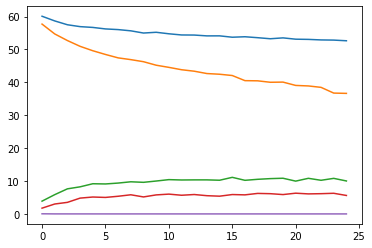

In [8]:
avg_mcrde_data0.plot()
avg_mcrde_data1.plot()
std_mcrde_data0.plot()
std_mcrde_data1.plot()
import matplotlib.pyplot as plt 
plt.plot(p)

In [9]:
"""
### MCRDE 평균, 표준편차 출력 파일을 text 파일에 저장한다.
# CHF, Healthy subjects는 각각 모두 14명이다.
# MultiScale Entropy method를 통해 scale(1~25)에서의 14명의 Entropy 평균, 표준 편차를 구한다. 
# 사용한 Entropy 기법은 MultiScale Cumulative Residual Dispersion Entropy이다.
# index: scale, data: avg, std

avg_mcrde_data0_path = './results/avg_mcrde_data0.txt'     
avg_mcrde_data1_path = './results/avg_mcrde_data1.txt' 
std_mcrde_data0_path = './results/std_mcrde_data0.txt'      
std_mcrde_data1_path = './results/std_mcrde_data1.txt'  

write_txt(avg_mcrde_chf_path, avg_mcrde_healthy_path,
          std_mcrde_chf_path, std_mcrde_healthy_path,
          avg_mcrde_chf, avg_mcrde_healthy,
          std_mcrde_chf, std_mcrde_healthy )
"""

"\n### MCRDE 평균, 표준편차 출력 파일을 text 파일에 저장한다.\n# CHF, Healthy subjects는 각각 모두 14명이다.\n# MultiScale Entropy method를 통해 scale(1~25)에서의 14명의 Entropy 평균, 표준 편차를 구한다. \n# 사용한 Entropy 기법은 MultiScale Cumulative Residual Dispersion Entropy이다.\n# index: scale, data: avg, std\n\navg_mcrde_data0_path = './results/avg_mcrde_data0.txt'     \navg_mcrde_data1_path = './results/avg_mcrde_data1.txt' \nstd_mcrde_data0_path = './results/std_mcrde_data0.txt'      \nstd_mcrde_data1_path = './results/std_mcrde_data1.txt'  \n\nwrite_txt(avg_mcrde_chf_path, avg_mcrde_healthy_path,\n          std_mcrde_chf_path, std_mcrde_healthy_path,\n          avg_mcrde_chf, avg_mcrde_healthy,\n          std_mcrde_chf, std_mcrde_healthy )\n"